In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [19]:
dow_map = {"Mon":1,"Tue":2,"Wed":3,"Thu":4,"Fri":5,"Sat":6,"Sun":7}
df["flight_day"] = df["flight_day"].map(dow_map).astype(int)

In [20]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [21]:
TARGET = "booking_complete"
y = df[TARGET].astype(int)


X = df.drop(columns=[TARGET])

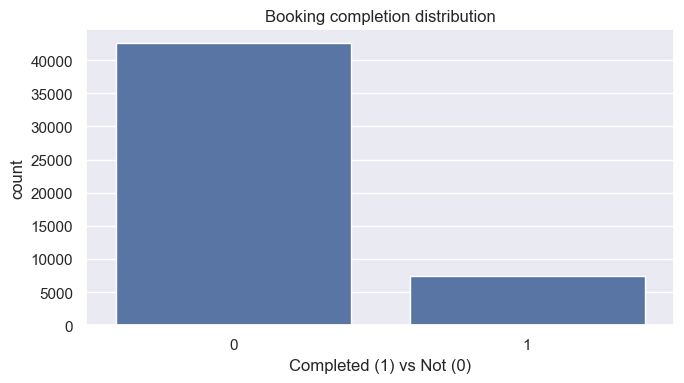

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

sns.set_theme(context="notebook")

plt.figure(figsize=(7,4))
sns.countplot(x="booking_complete", data=df)
plt.title("Booking completion distribution")
plt.xlabel("Completed (1) vs Not (0)")
plt.tight_layout()
plt.show()

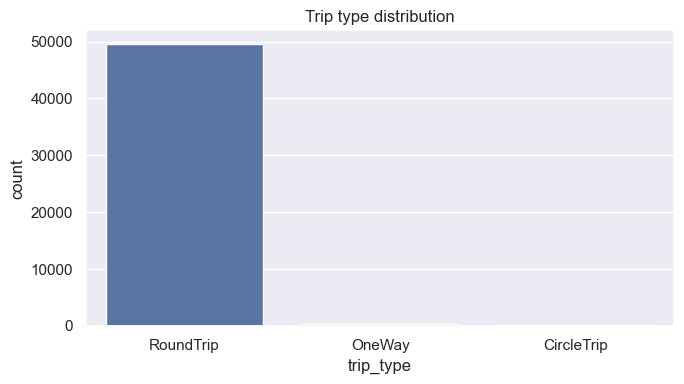

In [23]:
plt.figure(figsize=(7,4))
sns.countplot(x="trip_type", data=df, order=df["trip_type"].value_counts().index)
plt.title("Trip type distribution")
plt.tight_layout()
plt.show()


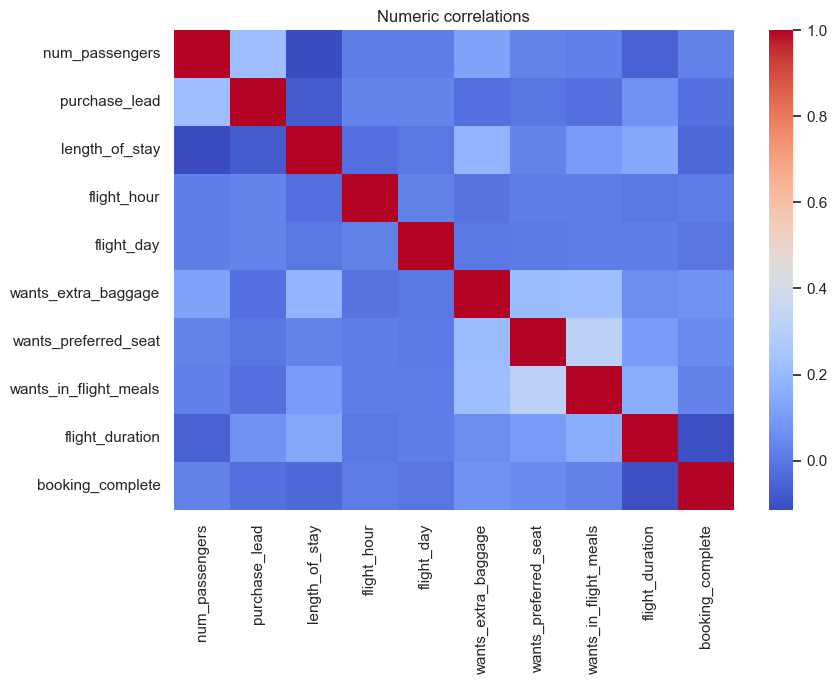

In [31]:
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(9,7))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Numeric correlations")
plt.tight_layout()
plt.show()

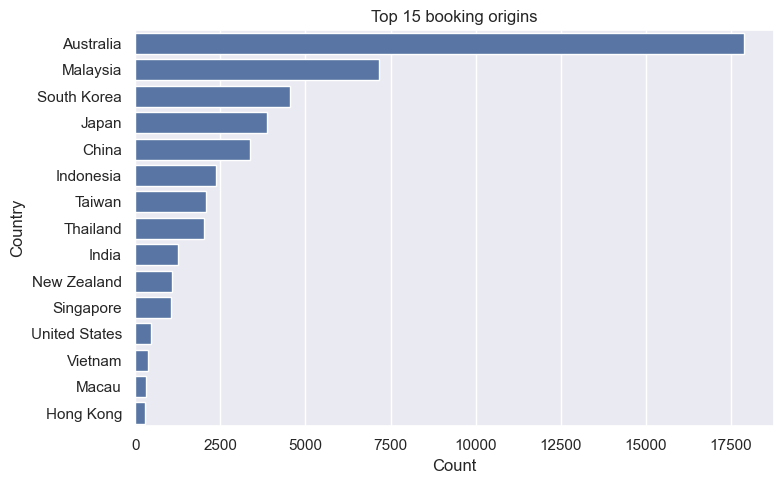

In [32]:
top_origins = df["booking_origin"].value_counts().head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=top_origins.values, y=top_origins.index)
plt.title("Top 15 booking origins")
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

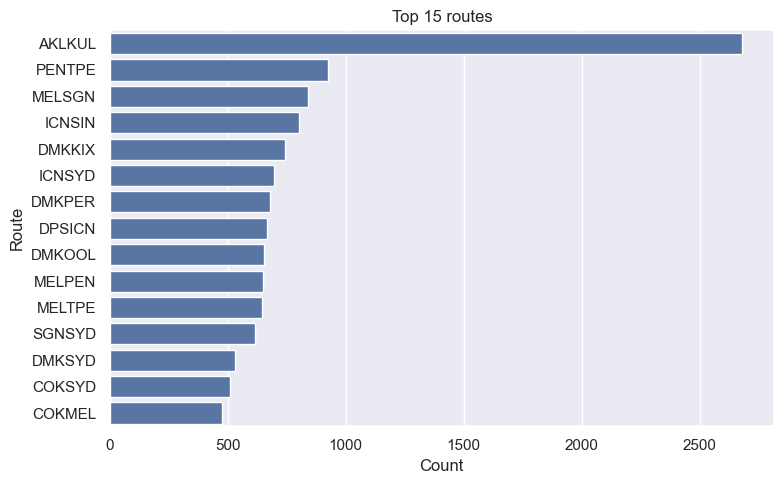

In [33]:
top_routes = df["route"].value_counts().head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=top_routes.values, y=top_routes.index)
plt.title("Top 15 routes")
plt.xlabel("Count")
plt.ylabel("Route")
plt.tight_layout()
plt.show()

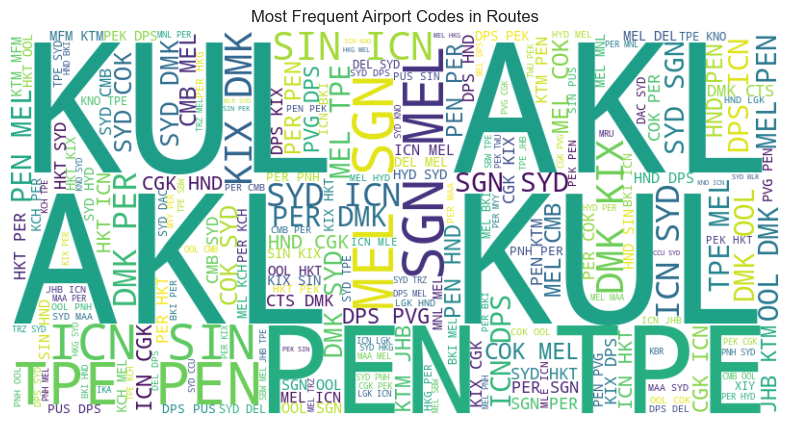

In [62]:
import re
from wordcloud import WordCloud

codes_series = df['route'].astype(str).str.upper().str.findall(r'[A-Z]{3}')
codes = [code for pair in codes_series for code in pair]  # flatten
route_text = ' '.join(codes)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(route_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Airport Codes in Routes")
plt.show()


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [42]:
TARGET = "flight_duration"
y = df[TARGET].astype(float)

In [43]:
X = df.drop(columns=[TARGET, "booking_complete"], errors="ignore").copy()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [45]:
high_card_cols = [c for c in X_train.select_dtypes(include="object").columns
                  if X_train[c].nunique() > 10]  # e.g., 'route', 'booking_origin'

global_mean = y_train.mean()
for c in high_card_cols:
    tmp = pd.DataFrame({c: X_train[c], TARGET: y_train})
    means = tmp.groupby(c)[TARGET].mean()
    X_train[c] = X_train[c].map(means).fillna(global_mean)
    X_test[c]  = X_test[c].map(means).fillna(global_mean)

In [46]:
low_card_cols = [c for c in X_train.select_dtypes(include="object").columns
                 if c not in high_card_cols]  # e.g., 'sales_channel','trip_type'

In [47]:
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

In [48]:
num_tf = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler())
])

ohe_tf = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_tf, num_cols),
        ("cat", ohe_tf, low_card_cols),
    ],
    remainder="drop"
)

reg = LinearRegression()

pipe = Pipeline([
    ("prep", preprocess),
    ("model", reg)
])


In [49]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('sc',
                                                                   StandardScaler())]),
                                                  ['num_passengers',
                                                   'purchase_lead',
                                                   'length_of_stay',
                                                   'flight_hour', 'flight_day',
                                                   'route', 'booking_origin',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sales_channel',
                                                   'trip_type'])])),
                ('model', LinearRegression())])

In [50]:
y_pred = pipe.predict(X_test)
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"R²: {r2:.4f}  |  MAE: {mae:.3f}  |  RMSE: {rmse:.3f}")

R²: 0.9961  |  MAE: 0.004  |  RMSE: 0.093


In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred = pipe.predict(X_test)

to_min = 60
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) * to_min
rmse= mean_squared_error(y_test, y_pred, squared=False) * to_min
print(f"R²: {r2:.4f} | MAE(min): {mae:.2f} | RMSE(min): {rmse:.2f}")


R²: 0.9961 | MAE(min): 0.25 | RMSE(min): 5.56


In [54]:
# Baseline: predict each test row by the TRAIN mean duration of its route
train_means = X_train.assign(flight_duration=y_train).groupby("route")["flight_duration"].mean()
y_base = X_test["route"].map(train_means).fillna(y_train.mean())
print(
    "Baseline — per-route mean:",
    "R²", round(r2_score(y_test, y_base),4),
    "| MAE(min)", round(mean_absolute_error(y_test, y_base)*60,2),
    "| RMSE(min)", round(mean_squared_error(y_test, y_base, squared=False)*60,2),
)


Baseline — per-route mean: R² 0.9961 | MAE(min) 0.25 | RMSE(min) 5.56


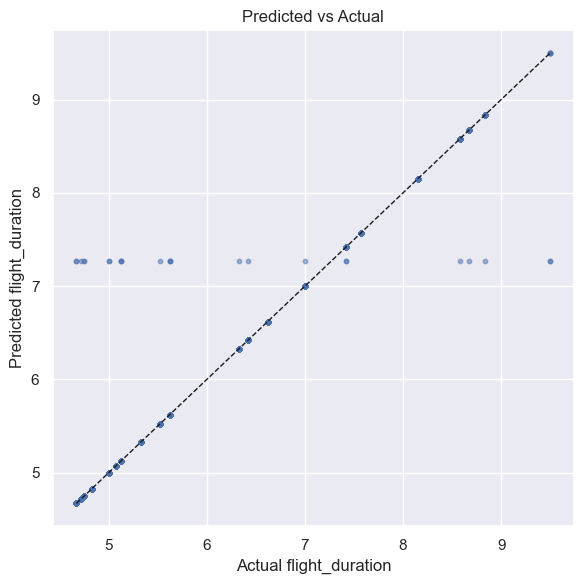

In [59]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=10, alpha=0.5)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'k--', linewidth=1)
plt.xlabel("Actual flight_duration")
plt.ylabel("Predicted flight_duration")
plt.title("Predicted vs Actual")
plt.tight_layout()
plt.show()

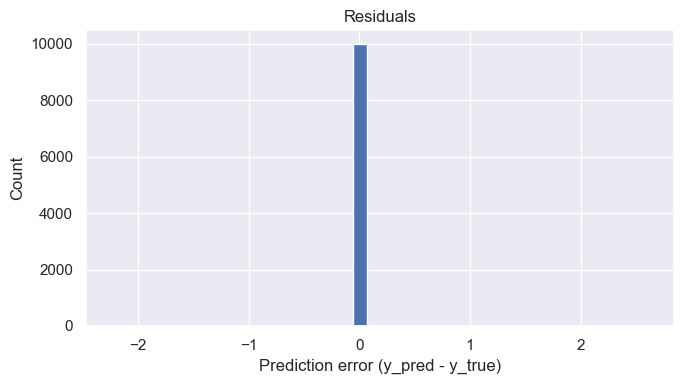

In [60]:
resid = y_pred - y_test
plt.figure(figsize=(7,4))
plt.hist(resid, bins=40)
plt.title("Residuals")
plt.xlabel("Prediction error (y_pred - y_true)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()